<a href="https://colab.research.google.com/github/ovieimara/ITNPBD6/blob/master/ExerciseSession5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

Run k-means clustering on the data we've provided... First, load the data.

In [4]:
import numpy as np
from matplotlib import pyplot as plt
d = np.loadtxt("kmeans_data.csv", delimiter=',')
display(d)

array([[171., 173.],
       [162., 172.],
       [166., 172.],
       ...,
       [ 35.,  12.],
       [ 37.,  12.],
       [ 43.,  12.]])

Now, run k-means to fit clusters to the data.

The variable called `d` must be an array where each row is a single observation. The `predict` function takes an array and produces a new array of cluster labels, one for each of the data points given.

`n_clusters` is the hyperparameter (which a refer to as k). `random_start` affects where the random centres appear at the start of the algorithm's run.

`kmeans.cluster_centers` gives us the locations of the centres.

In [15]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0).fit(d)
kmeans_pred = kmeans.predict(d)
kmeans.cluster_centers_

array([[130.6645768 ,  50.82758621],
       [ 87.46588235, 131.31529412],
       [ 40.65281899,  44.11721068],
       [168.42635659, 161.68217054]])

The silhouette score measures how similar members of a cluster are to each other compared to members of other clusters. The highest (and best) score is 1.

In [16]:
from sklearn.metrics import silhouette_score

silhouette_score(d, kmeans_pred)

np.float64(0.7052173458830844)

Now we visualise the data again in a scatter plot where the colour of the points reflects the identity of the cluster they belong to.

We can do this easily because there are only two variables in the data, so we use one for the x-coordinate and one for the y-coordinate.

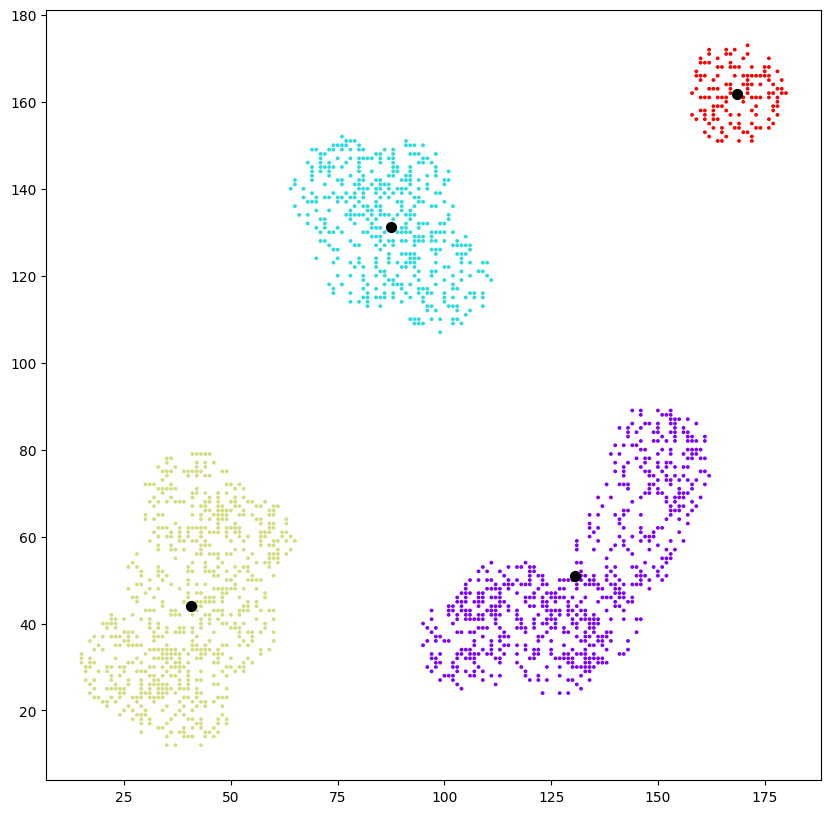

In [17]:
width = 10
height = 10
pointsize = 3
plt.figure(figsize=(width, height))
plt.scatter(d[:, 0], d[:, 1], c=kmeans_pred, cmap='rainbow', s=pointsize)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=50, color='black')
plt.show()

Try a few values for `k` above. Which produces the highest silhoutte score? Can you see the difference in the clusters obtained for each value of `k`?

# Optional: Try your own data...
Let's try some other data sets and see how k-means deals with them.

We will now take a hard-drawn image of data points and convert it into a numerical form that we can use for testing the clustering algorithms.

The next section loads an image that represents a scatter plot (without axes or other notation) and converts it into a numpy array of data - one point per pixel. You can then load this data to try with the clustering algorithms for this session.

We've provided the image "4cluster.png" that was used to generate the data that we tried applying k-means to above. Using the spraypainter in Paint or a similar application, make a few of your own data sets with different shapes to the point clouds. Are there any shapes that k-means clusters in a way you didn't expect?


**for this to work, you'll need to install opencv-python in your anaconda environment. This is set up on the lab machines/Apps Anywhere, but on your own machine either add it through anaconda navigator, or open a terminal and run `pip install opencv-python`**

In [18]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

## Choose your graph size
You can set the size of all the graphs that are plotted below

In [19]:
width = 10
height = 10
pointsize = 5
linewid = 6
font = {'family' : 'calibri',
        'weight' : 'normal',
        'size'   : 22}
import matplotlib
matplotlib.rc('font', **font)

## Load an Image
Draw yourself an image to load. Use whatever paint program you like. Here are the rules:
- The image can be any size you want - the resulting numpy array will match its dimensions
- White space (255,255,255) is empty
- Any other colour is a data point
- Data points are one pixel big
- Don't include axes or any other marks - they will be treated as data points

The function below produces a numpy array from an image file. Define it here, and call it later.

The function uses cv2, the opencv library, to manipulate the image. You might need to add opencv to your anaconda environment for it to work.

In [20]:
def png_to_numpy(filename):
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    show = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    d = np.array([])
    rows = img.shape[0]
    cols = img.shape[1]
    for x in range(rows):
        for y in range(cols):
            if img[x][y] < 255:
                if d.shape[0] > 0:
                    d = np.vstack((d,[y,rows-x]))
                else:
                    d = np.array([y,rows-x])
    return d

## Choose a file and call the function with its name or path
In this example, we open `'4clusters.png'` but you might call your file something different.

In [22]:
d = png_to_numpy('4clusters.png')

## Plot the resulting data so you can see what it looks like|

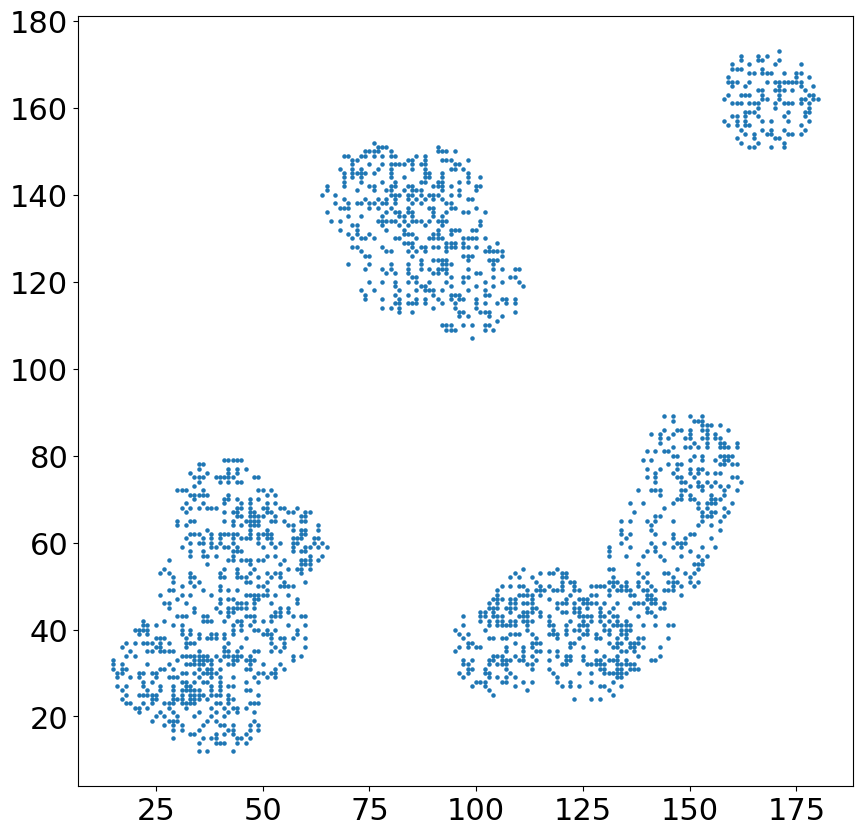

In [23]:
plt.figure(figsize=(width, height))
plt.scatter(d[:, 0], d[:, 1], s=pointsize)
plt.show()

## Save the data to a file
Only run this if you want to save the data that was extracted from the image.

In [ ]:
np.savetxt("kmeans_data.csv", d, delimiter=',')

# DBSCAN Clustering

Using DBSCAN is very similar to k-means:

In [25]:
from sklearn.cluster import DBSCAN
dbscan =  DBSCAN(eps=5, min_samples=2).fit(d)
dbscan_pred = dbscan.labels_
dbscan_pred = -1*(dbscan_pred-1)  # Swap 1 and 0 around so colours match kmeans

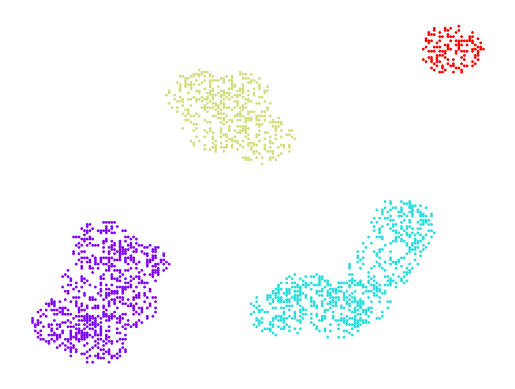

In [26]:
plt.scatter(d[:, 0], d[:, 1], c=dbscan_pred, s=1, cmap='rainbow')
plt.axis('off')
plt.show()

Following the same procedure that you did for k-means, perform a DBSCAN clustering of the data and experiment with different values for Epsilon and minPts.

Now compare k-means with DBSCAN by using both to cluster the data in the file circles.csv from this week's data.

What did you find?



# Hierarchical Clustering
The code you need to perform hierarchical clustering in Python with Scikit-Learn is given below.

In [27]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(d)

To control the depth of the tree, you choose either a distance threshold, or a number of clusters. Note that None means no value, not zero!

You can plot the resulting tree, known as a dendogram, with this code. First, we define the function to plot the dendogram.

In [28]:
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)
    dendrogram(linkage_matrix, **kwargs)

Now we call it with the clustering object we have just made

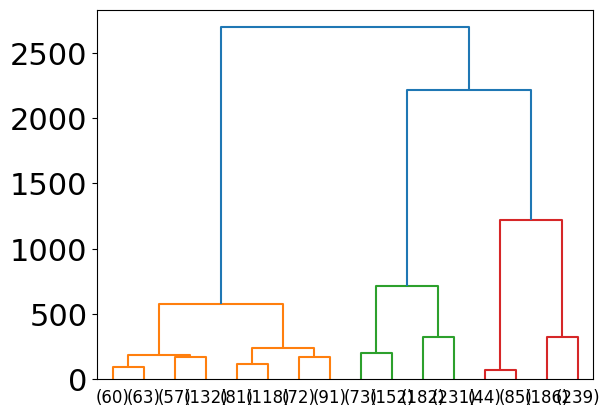

In [29]:
plot_dendrogram(clustering, truncate_mode='level', p=3)